In [1]:
from warnings import filterwarnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from collections import Counter

In [2]:
import pandas as pd
df=pd.read_csv("task4.csv")
df

,Document,Topic_group
0,connection with icon icon dear please setup ic...,Hardware
1,work experience user work experience user hi w...,Access
2,requesting for meeting requesting meeting hi p...,Hardware
3,reset passwords for external accounts re expir...,Access
4,mail verification warning hi has got attached ...,Miscellaneous
...,...,...
47832,git space for a project issues with adding use...,Access
47833,error sent july error hi guys can you help out...,Miscellaneous
47834,connection issues sent tuesday july connection...,Hardware
47835,error cube reports sent tuesday july error hel...,HR Support


In [2]:
df.columns

Index(['Document', 'Topic_group'], dtype='object')

In [3]:
df.info

<bound method DataFrame.info of                                                 Document    Topic_group
0      connection with icon icon dear please setup ic...       Hardware
1      work experience user work experience user hi w...         Access
2      requesting for meeting requesting meeting hi p...       Hardware
3      reset passwords for external accounts re expir...         Access
4      mail verification warning hi has got attached ...  Miscellaneous
...                                                  ...            ...
47832  git space for a project issues with adding use...         Access
47833  error sent july error hi guys can you help out...  Miscellaneous
47834  connection issues sent tuesday july connection...       Hardware
47835  error cube reports sent tuesday july error hel...     HR Support
47836  running out on extensions hello please be advi...       Hardware

[47837 rows x 2 columns]>

In [4]:
df.isnull()


,Document,Topic_group
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
47832,False,False
47833,False,False
47834,False,False
47835,False,False


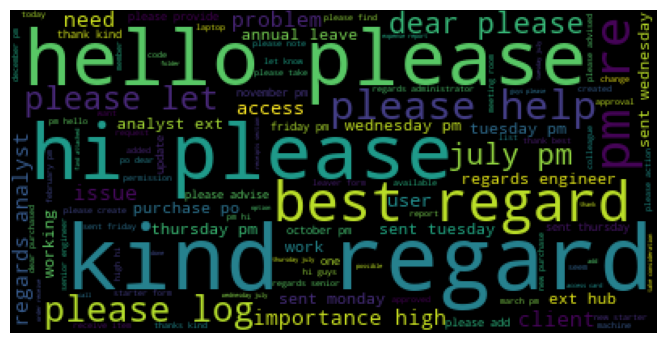

In [5]:
text = " ".join(df["Document"])
#Word Cloud:
#A word cloud is a visual representation of text data. Words are displayed in various sizes, with the size proportional to their frequency or importance.
wc=WordCloud(stopwords=STOPWORDS).generate(text)
plt.figure(figsize=(9,4.2))
plt.imshow(wc)
plt.axis("off")
plt.show()

Max sequence: 981


C:\Users\Admin\AppData\Local\Temp\ipykernel_7468\1337567438.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


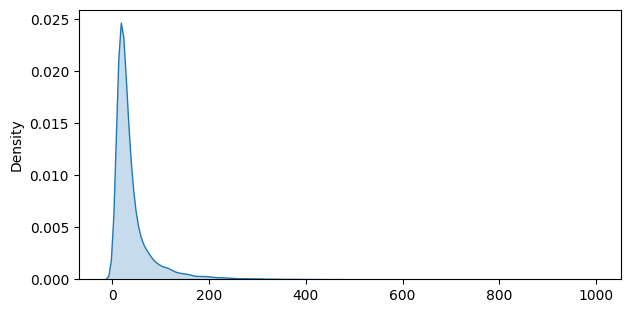

In [6]:

seq_text = [len(txt.split()) for txt in df["Document"]]
print("=============")
print(f"Max sequence: {max(seq_text)}")
print("=============")
fig,ax = plt.subplots(figsize = (7,3.5))
#sns.histplot(seq_text, fill = False, stat = 'density', ax = ax)
sns.kdeplot(seq_text, fill = True, ax = ax)
fig.show()

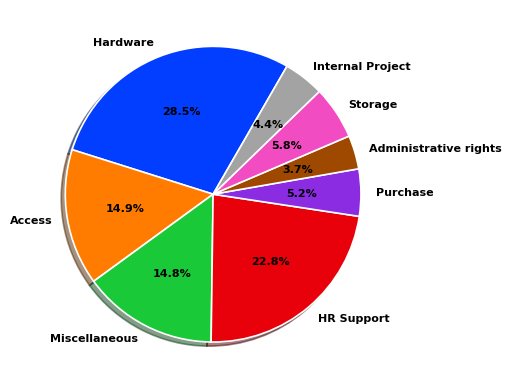

In [7]:

plt.pie(x = list(Counter(df['Topic_group']).values()), 
        labels = list(Counter(df['Topic_group']).keys()), 
        colors = [color for color in sns.color_palette(palette = 'bright', n_colors = df['Topic_group'].nunique())], 
        shadow = True, 
        autopct = "%.1f%%", 
        wedgeprops = {'edgecolor':'white', 'linewidth':1.2}, 
        textprops = {'fontsize':8, 'color':'black', 'fontweight':'bold'}, 
        startangle = 60)
plt.show()

In [10]:

stop_words = stopwords.words('english')

filterwarnings('ignore')

In [11]:
def remove_stopwords(text):
    words = text.lower().split()
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)

df['Document'] = df['Document'].apply(remove_stopwords)

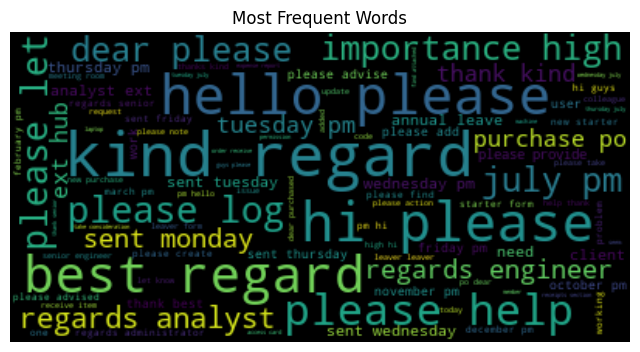

In [13]:
def create_cloud(data_frame):
    # Get the text from the Document column
    text = data_frame["Document"].str.cat(sep=" ")  # Concatenate all documents
    text = text.lower()

    # Create the WordCloud object
    wordcloud = WordCloud(max_font_size=40).generate(text)

    # Create a plot and display the word cloud
    plt.figure(figsize=(8, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("Most Frequent Words")
    plt.show()

create_cloud(df)

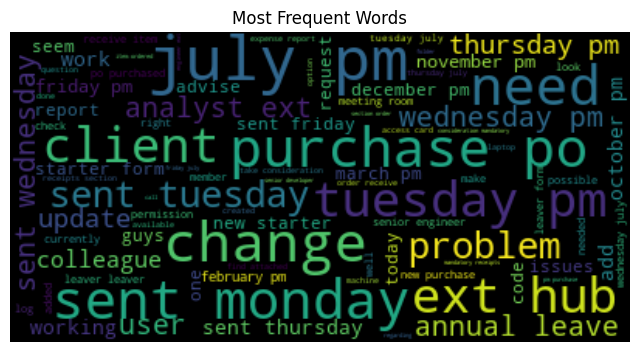

In [14]:
words_to_remove = ["ga", "kind", "hello", "please", "let", "help", "best", "regards", "icon", "dear", "per", "hi", "thanks", "thank", "importance", "high", "issue", "ab", "abc"]

def remove_words(text):
  return " ".join([word for word in text.lower().split() if word not in words_to_remove])

df["Document"] = df["Document"].apply(remove_words)
create_cloud(df)

In [15]:
vectorizer = TfidfVectorizer(stop_words='english')
vectorizer.fit(df["Document"])

TfidfVectorizer(stop_words='english')

In [16]:
tfidf_matrix = vectorizer.transform(df["Document"])

In [17]:
grouped_documents = {}
for doc, topic in zip(df["Document"], df["Topic_group"]):
  if topic not in grouped_documents:
    grouped_documents[topic] = []
  grouped_documents[topic].append(doc)

In [18]:
scored_words_per_topic = {}
vectorizer = TfidfVectorizer(stop_words=stop_words)  
documents_by_topic = [" ".join(docs) for topic, docs in grouped_documents.items()]
tfidf_matrix = vectorizer.fit_transform(documents_by_topic)
feature_names = vectorizer.get_feature_names_out()
for idx, topic in enumerate(grouped_documents.keys()):
  documents = grouped_documents[topic]
  document_text = " ".join(documents) 
  scores = vectorizer.transform([document_text])[0].toarray()[0]
  scored_words = sorted(zip(feature_names, scores), key=lambda x: x[1], reverse=True)[:10]
  print(f"{topic}", end=" ")
  print(scored_words)
  scored_words_per_topic[topic] = scored_words

Hardware [('pm', np.float64(0.3322319320344907)), ('sent', np.float64(0.2833829499993043)), ('access', np.float64(0.20065076699995243)), ('tuesday', np.float64(0.15281071402573373)), ('wednesday', np.float64(0.14347812021178247)), ('thursday', np.float64(0.13897997814830143)), ('engineer', np.float64(0.13309455862598982)), ('monitor', np.float64(0.1307200589743949)), ('friday', np.float64(0.13040408113007593)), ('site', np.float64(0.1281339907428986))]
Access [('confluence', np.float64(0.42555668916877337)), ('pm', np.float64(0.3652771752709403)), ('card', np.float64(0.2204444847806447)), ('user', np.float64(0.22027848742764725)), ('access', np.float64(0.21936550198616114)), ('password', np.float64(0.2031761825331619)), ('license', np.float64(0.15603751181762504)), ('create', np.float64(0.1410977500478524)), ('users', np.float64(0.1283989525435457)), ('git', np.float64(0.12452507227587525))]
Miscellaneous [('pm', np.float64(0.3832603934144148)), ('change', np.float64(0.3653665856871402

In [19]:
cv = CountVectorizer(max_features=200)
x = cv.fit_transform(df["Document"]).toarray()
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 3, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 2],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [20]:
cv.get_feature_names_out()

array(['able', 'access', 'account', 'accounts', 'action', 'active', 'ad',
       'add', 'added', 'additional', 'administrator', 'advise', 'advised',
       'also', 'analyst', 'annual', 'application', 'approval', 'approve',
       'approved', 'approver', 'ask', 'assign', 'assigned', 'assist',
       'assistance', 'attached', 'available', 'back', 'ca', 'call',
       'cannot', 'card', 'cards', 'care', 'change', 'changed', 'changes',
       'check', 'client', 'code', 'colleagues', 'communication',
       'confluence', 'connect', 'consultant', 'content', 'could',
       'create', 'created', 'credentials', 'currently', 'date', 'days',
       'december', 'delete', 'details', 'developer', 'device',
       'discipline', 'done', 'en', 'engineer', 'error', 'expense', 'ext',
       'february', 'file', 'files', 'find', 'floor', 'folder',
       'following', 'form', 'friday', 'get', 'give', 'groups', 'guys',
       'head', 'hub', 'id', 'information', 'infrastructure', 'issues',
       'item', 'job'

In [21]:
y = df["Topic_group"]
le = LabelEncoder()
y = le.fit_transform(y)

In [22]:
le.classes_

array(['Access', 'Administrative rights', 'HR Support', 'Hardware',
       'Internal Project', 'Miscellaneous', 'Purchase', 'Storage'],
      dtype=object)

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [29]:
rf=RandomForestClassifier(n_estimators=50)
model=rf.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [30]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy Score: 0.7853260869565217

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.82      0.83      1455
           1       0.72      0.44      0.55       342
           2       0.80      0.80      0.80      2107
           3       0.75      0.81      0.78      2760
           4       0.76      0.73      0.74       451
           5       0.74      0.75      0.74      1400
           6       0.95      0.86      0.90       497
           7       0.86      0.79      0.82       556

    accuracy                           0.79      9568
   macro avg       0.80      0.75      0.77      9568
weighted avg       0.79      0.79      0.78      9568


Confusion Matrix:
 [[1198    6   60  106   23   49    3   10]
 [  17  152   10  137    3   20    1    2]
 [  54    7 1694  209   26  100    2   15]
 [  81   35  188 2225   24  157   15   35]
 [   8    3   42   46  328   23    1    0]
 [  47    8  101  158   24 1052    1    9]
 [  11    1

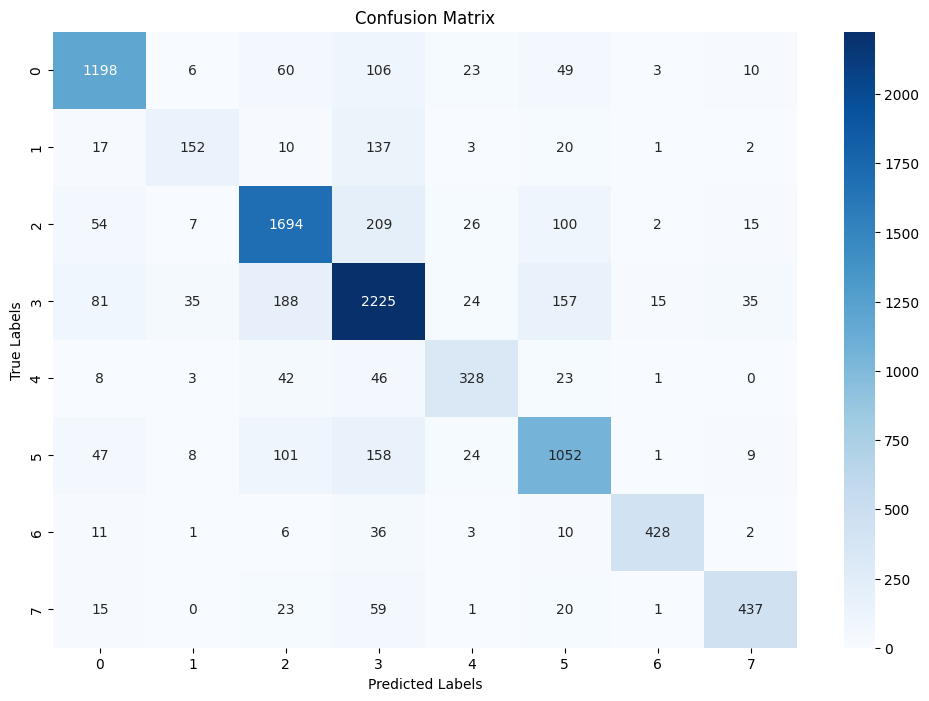

In [36]:

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

class_names = list(set(y_test))

plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
